# Faragó Facundo - Gustavo Doctorovich

# *Importar librerias y dataset*

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import WholeBrain.Observables.FC as FC
import WholeBrain.Observables.swFCD as swFCD
import WholeBrain.Observables.phFCD as phFCD
import WholeBrain.Observables.GBC as GBC
#import Tests.Deco_Optim1 as fig_Deco
import Tests.Herzog as fig_Herzog
import os


# Cambio constante de la libreria para que no descarte datos
phFCD.discardOffset = 0

# Ruta al archivo de texto con los datos de los sujetos 25x25
ruta_archivo_25 = 'Datos/Datasets/StructuralConnectivity/netmats2_25.txt'

# Ruta al archivo de texto con los datos de los sujetos 200x200
ruta_archivo_200 = 'Datos/Datasets/StructuralConnectivity/netmats2_200.txt'

# Ruta al archivo de texto con los time series
ruta_archivo_ts = 'Datos/Datasets/fMRI/100206.txt'

# Cargar los datos de los sujetos desde los archivos de texto
datos_sujetos_25 = np.loadtxt(ruta_archivo_25)
datos_sujetos_200 = np.loadtxt(ruta_archivo_200)

# Reshape para crear matriz 3D 
matrices_por_sujeto_25 = datos_sujetos_25.reshape((1003, 25, 25))
matrices_por_sujeto_200 = datos_sujetos_200.reshape((1003, 200, 200))

# Calcular la matriz de conectividad promedio de todos los sujetos
matriz_conectividad_promedio = np.mean(matrices_por_sujeto_25, axis=0)
matriz_conectividad_promedio = matriz_conectividad_promedio/matriz_conectividad_promedio.max()
matriz_conectividad_promedio = matriz_conectividad_promedio*0.1

# Cargar los datos timeseries de los sujetos desde el archivo de texto
datos_ts = np.loadtxt(ruta_archivo_ts)

# Reshape para crear una matriz 2D (4800, 25)
matriz_ts = datos_ts.reshape((4800, 25))
matriz_tsT = matriz_ts.T

Going to use Functional Connectivity (FC)...
Going to use Sliding Windows Functional Connectivity Dynamics (swFCD)...
Going to use Phase-Interaction Matrix...
Going to use Phase Functional Connectivity Dynamics (phFCD)...
Going to use Global Brain Connectivity (GBC)...
Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler-Maruyama Integrator...
Going to use the Balanced J9 (FIC) mechanism...
Going to use the Balanced J (FIC) mechanism in HerzogEtAl2022...


# *Resultados*

## Sin WholeBrain

### Matriz de conectividad

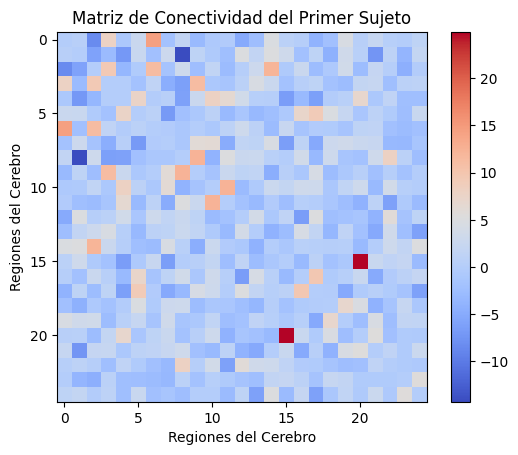

In [2]:
# Seleccionar una sola matriz de conectividad (por ejemplo, la primera)
matriz_conectividad_individual = matrices_por_sujeto_25[0]

# Crear la visualización de la matriz de conectividad individual
plt.imshow(matriz_conectividad_individual, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad del Primer Sujeto')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### Matriz promedio de matrices de conectividad

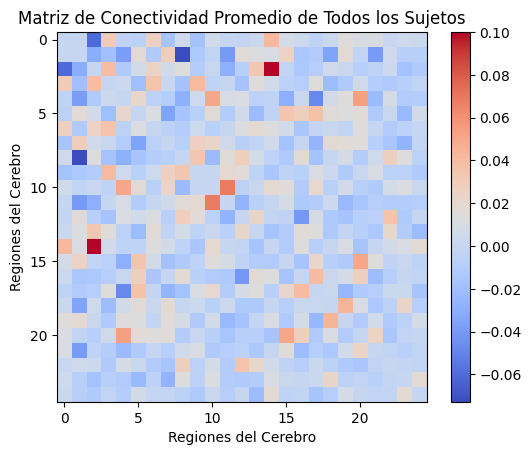

In [6]:
# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### fRMI

In [ ]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.coolwarm(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Columna {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

### Correlacion (fMRI)

In [ ]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()


## Con WholeBrain

### Functional Connectivity

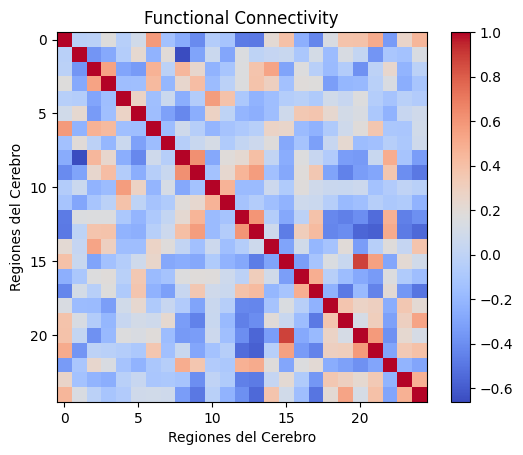

In [31]:
FC_mt = FC.from_fMRI(matriz_tsT, True, True)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(FC_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Functional Connectivity')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### Sliding Window FCD


In [ ]:
sw_FCD = swFCD.from_fMRI(matriz_tsT,True,True)
sw_FCD_mt = swFCD.buildFullMatrix(sw_FCD)  

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(sw_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Sliding Window FCD')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show() 

### Phase Interaction Matrix

In [4]:
ph_FCD = phFCD.from_fMRI(matriz_tsT,True,True)
ph_FCD_mt = phFCD.buildFullMatrix(ph_FCD)             

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(ph_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Phase Interaction Matrix')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show()   

### Global Brain Connectivity

In [ ]:
FCD_mt = GBC.from_fMRI(matriz_tsT,True,True)
GBC_mt = GBC.postprocess(FCD_mt) 

In [ ]:
# Reformatear el vector a una matriz de una columna (25x1)
matriz = GBC_mt.reshape((25, 1))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Mostrar la matriz como imagen
im = ax.imshow(matriz, cmap='coolwarm', aspect='auto', extent=[0, 1, 0, 25])

# Añadir una barra de color
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Valor')

# Ajustar las etiquetas del eje x
ax.set_xticks([])  # Desactivar las etiquetas del eje x

# Añadir etiquetas y título
plt.ylabel('Regiones del Cerebro')
plt.title('Global Brain Connectivity')

# Mostrar la visualización
plt.show()

### Figura DMF

#### Deco

##### 25x25

=    simulating E-E (no FIC)         =


100%|██████████| 111/111 [00:44<00:00,  2.49it/s]


=    simulating FIC                  =
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.05.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.1.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.15.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.2.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.25.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.3.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.35.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.4.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.45.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.5.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.55.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.6.txt !!!
Loading

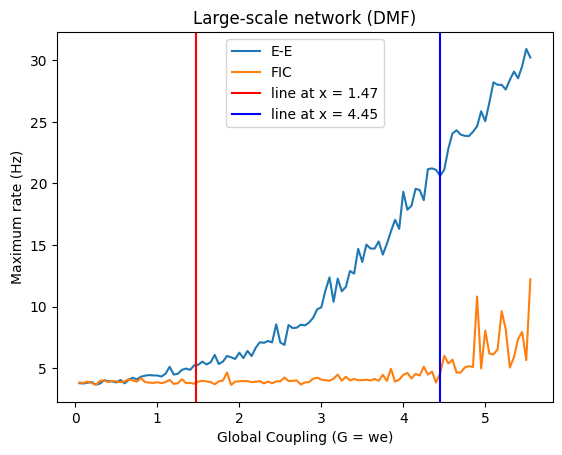

In [3]:
# Carpeta destino
folder_path = 'Datos/Results/Results_25x25'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes=6, wEnd=5.6)

##### 200x200

In [ ]:
# Carpeta destino
folder_path = 'Datos/Results/Results_200x200'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes=6)

#### Herzog

##### 25x25

=    simulating E-E (no FIC)         =


100%|██████████| 120/120 [01:22<00:00,  1.45it/s]


=    simulating FIC                  =
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.05.txt
Balancing for we=0.05
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.1.txt
Balancing for we=0.1
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.15.txt
Balancing for we=0.15000000000000002
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.2.txt
Balancing for we=0.2
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.25.txt
Balancing for we=0.25
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.3.txt
Balancing for we=0.3
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.35.txt
Balancing for we=0.35000000000000003
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.4.txt
Balancing for we=0.4
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.45.txt
Balancing for we=0.45
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.5.txt
Ba

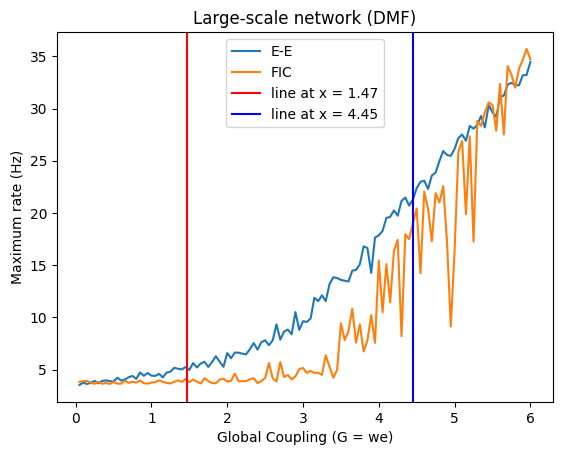

In [2]:
# Carpeta destino
folder_path = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes= 4)

In [42]:
import scipy.io as sio
import matplotlib.pyplot as plt

# Carga de datos desde el archivo .mat
data = sio.loadmat('Datos/Results/Results_25x25/DecoEtAl2018_fneuro.mat')  # Asegúrate de proporcionar la ruta correcta

# Extrae los valores de we (G) y los valores óptimos obtenidos
we_values = data['we']
fitting_FC = data['fitting_PLA']
fitting_swFCD = data['FCDfitt_PLA']

# Encuentra los índices de los valores óptimos para FC y swFCD
index_optimal_FC = fitting_FC.argmax()
index_optimal_swFCD = fitting_swFCD.argmax()

# Encuentra los valores óptimos correspondientes para FC y swFCD
optimal_value_FC = fitting_FC[index_optimal_FC]
optimal_value_swFCD = fitting_swFCD[index_optimal_swFCD]

# Encuentra los valores de we (G) correspondientes a los valores óptimos
optimal_we_FC = we_values[index_optimal_FC]
optimal_we_swFCD = we_values[index_optimal_swFCD]

# Graficar los valores óptimos para FC y swFCD
plt.figure(figsize=(8, 6))
plt.scatter(optimal_we_FC, optimal_value_FC, color='blue', label='Valor Óptimo FC')
plt.scatter(optimal_we_swFCD, optimal_value_swFCD, color='orange', label='Valor Óptimo swFCD')
plt.xlabel('Valor de we (G)')
plt.ylabel('Valor Óptimo')
plt.title('Valores Óptimos en función de we (G)')
plt.legend()
plt.grid(True)
plt.show()


IndexError: index 12 is out of bounds for axis 0 with size 1

In [45]:
# Directorio que contiene los archivos de texto
directory = 'Datos/Datasets/fMRI'

NumSubjects = 3  # Number of Subjects in empirical fMRI dataset, originally 20...
N = 25 # Parcelations
Tmax = 4800 # Total time

# Lista para almacenar las matrices ajustadas individualmente
matrices_individuales = []

# Contador para rastrear el número de archivos cargados
archivos_cargados = 0

# Iterar sobre los archivos en el directorio
for archivo in os.listdir(directory):
    if archivo.endswith('.txt'):
        # Cargar los datos del archivo
        datos_ts = np.loadtxt(os.path.join(directory, archivo))
        # Ajustar la forma a 4800x25
        matriz_ajustada = datos_ts.reshape((Tmax, N))
        matriz_ajustada = matriz_ajustada.T
        # Añadir la matriz ajustada a la lista
        matrices_individuales.append(matriz_ajustada)
        archivos_cargados += 1

    if archivos_cargados >= NumSubjects:
        break

# Convertir la lista de matrices en una matriz tridimensional
matriz_tridimensional = np.dstack(matrices_individuales)

In [52]:

hay_nan = np.isnan(matriz_tridimensional)
if np.any(hay_nan):
    print("La matriz contiene al menos un NaN.")
else:
    print("La matriz no contiene NaN.")

La matriz no contiene NaN.
